# Imports

In [1]:
# imports
import numpy as np
import torch
from tueplots import bundles, figsizes
import wandb
import matplotlib.pyplot as plt

import sys

%load_ext autoreload
%autoreload 2

sys.path.insert(0, '.')

In [2]:
from analysis import sweep2df, learning_stats,corrected_jacobian_stats,correct_ica_scale_permutation, RED, BLUE


In [3]:
plt.rcParams.update(bundles.neurips2022(usetex=True))
plt.rcParams.update({
    'text.latex.preamble': [r'\usepackage{amsfonts}', # mathbb
                            r'\usepackage{amsmath}'] # boldsymbol
})

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/_collections_abc.py:834: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [32]:
# Constants
ENTITY = "causal-representation-learning"
PROJECT = "nl-causal-representations"

# W&B API
api = wandb.Api(timeout=200)
runs = api.runs(ENTITY + "/" + PROJECT)

# Data loading

In [5]:
SWEEP_ID = "gz1yqsuk"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_sweep_{SWEEP_ID}"
print(f"Loading sweep with {SWEEP_ID=}")
df1, (true_unmix_jacobians1, est_unmix_jacobians1, permute_indices1) = sweep2df(sweep.runs, filename, save=True, load=True)

SWEEP_ID = "5gzpzb23"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_sweep_{SWEEP_ID}"
print(f"Loading sweep with {SWEEP_ID=}")
df2, (true_unmix_jacobians2, est_unmix_jacobians2, permute_indices2) = sweep2df(sweep.runs, filename, save=True, load=True)

df = df1.append(df2)
true_unmix_jacobians = true_unmix_jacobians1 +true_unmix_jacobians2
est_unmix_jacobians = est_unmix_jacobians1+est_unmix_jacobians2
permute_indices = permute_indices1+permute_indices2

CommError: Could not find sweep <Sweep causal-representation-learning/nl-causal-representations/gz1yqsuk>

## 3D SEM

In [12]:

SWEEP_ID = "vfv1je0d" #"nz4r5d8a"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_3d_sweep_{SWEEP_ID}"
df3d, (true_unmix_jacobians3d, est_unmix_jacobians3d, permute_indices3d,hsic_adj_monti_variant) = sweep2df(sweep.runs, filename, save=True, load=True)

In [ ]:
SWEEP_ID = "tpkxr1kj"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_3d_sparse_sweep_{SWEEP_ID}"
df3d_sparse, (true_unmix_jacobians3d_sparse, est_unmix_jacobians3d_sparse, permute_indices3d_sparse,hsic_adj_monti_variant) = sweep2df(sweep.runs, filename, save=True, load=True)

## 5D SEM

In [6]:
SWEEP_ID = "h6y1gkvo"#"f5nxtdxz" #"h6y1gkvo"#"3ldi48id"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_sweep_{SWEEP_ID}"
df5d, (true_unmix_jacobians5d, est_unmix_jacobians5d, permute_indices5d,hsic_adj5d) = sweep2df(sweep.runs, filename, save=True, load=True)

	 Loading sem_5d_sweep_h6y1gkvo...


In [32]:
SWEEP_ID = "k755kpao"#"f5nxtdxz" #"h6y1gkvo"#"3ldi48id"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_sweep_hsic_{SWEEP_ID}"
df5d_hsic, (true_unmix_jacobians5d_hsic, est_unmix_jacobians5d_hsic, permute_indices5d_hsic,hsic_adj5d_hsic) = sweep2df(sweep.runs, filename, save=True, load=False)

Encountered a faulty run with ID royal-sweep-55


In [41]:
SWEEP_ID = "r1amhr93"#"f5nxtdxz" #"h6y1gkvo"#"3ldi48id"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_sweep_no_roll_{SWEEP_ID}"
df5d_no_roll, (true_unmix_jacobians5d_no_roll, est_unmix_jacobians5d_no_roll, permute_indices5d_no_roll,hsic_adj5d_no_roll) = sweep2df(sweep.runs, filename, save=True, load=False)

Encountered a faulty run with ID hardy-sweep-37
Encountered a faulty run with ID blooming-sweep-18
Encountered a faulty run with ID sweet-sweep-11
Encountered a faulty run with ID stilted-sweep-8


In [7]:
SWEEP_ID = "jazli1vc"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_sparse_sweep_{SWEEP_ID}"
df5d_sparse, (true_unmix_jacobians5d_sparse, est_unmix_jacobians5d_sparse, permute_indices5d_sparse,hsic_adj5d_sparse) = sweep2df(sweep.runs, filename, save=True, load=True)

Encountered a faulty run with ID glorious-sweep-6


In [6]:
SWEEP_ID = "bf49qn7q"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_randn_sweep_{SWEEP_ID}"
df5d_randn, (true_unmix_jacobians5d_randn, est_unmix_jacobians5d_randn, permute_indices5d_randn,hsic_adj5d_randn) = sweep2df(sweep.runs, filename, save=True, load=True)

In [9]:
SWEEP_ID = "ykqym3a0"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_no_permute_no_offset_sweep_{SWEEP_ID}"
df5d_no_permute_no_offset, (true_unmix_jacobians5d_no_permute_no_offset, est_unmix_jacobians5d_no_permute_no_offset, permute_indices5d_no_permute_no_offset,hsic_adj5d_no_permute_no_offset) = sweep2df(sweep.runs, filename, save=True, load=True)

In [7]:
SWEEP_ID = "q573owry"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_no_permute_sweep_{SWEEP_ID}"
df5d_no_permute, (true_unmix_jacobians5d_no_permute, est_unmix_jacobians5d_no_permute, permute_indices5d_no_permute,hsic_adj5d_no_permute) = sweep2df(sweep.runs, filename, save=True, load=True)

	 Loading sem_5d_no_permute_sweep_q573owry...


In [39]:
SWEEP_ID = "teiu5gdj"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_munkres_sweep_{SWEEP_ID}"
df5d_munkres, (true_unmix_jacobians5d_munkres, est_unmix_jacobians5d_munkres, permute_indices5d_munkres,hsic_adj5d_munkres, ica_permute_munkres) = sweep2df(sweep.runs, filename, save=True, load=False)

In [34]:
df5d_munkres

,name,dim,permute,variant,n_mixing_layer,use_sem,nonlin_sem,force_chain,force_uniform,mcc,val_loss
0,skilled-sweep-60,5,False,119,1,True,True,False,False,0.999370,1.985157
1,fragrant-sweep-59,5,False,119,1,True,True,False,False,0.999358,1.893308
2,winter-sweep-58,5,False,119,1,True,True,False,False,0.999405,1.948391
3,earnest-sweep-57,5,False,119,1,True,True,False,False,0.999753,1.926710
4,stellar-sweep-56,5,False,119,1,True,True,False,False,0.999728,1.909443
5,ethereal-sweep-55,5,False,97,1,True,True,False,False,0.999370,1.985157
6,firm-sweep-54,5,False,97,1,True,True,False,False,0.999358,1.893308
7,dutiful-sweep-53,5,False,97,1,True,True,False,False,0.999405,1.948391
8,devout-sweep-48,5,False,75,1,True,True,False,False,0.999405,1.948391
9,volcanic-sweep-47,5,False,75,1,True,True,False,False,0.999753,1.926710


## 8D SEM

In [14]:
SWEEP_ID = "7sscc3w1"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_8d_sweep_{SWEEP_ID}"
df8d, (true_unmix_jacobians8d, est_unmix_jacobians8d, permute_indices8d,hsic_adj8d) = sweep2df(sweep.runs, filename, save=True, load=True)

Encountered a faulty run with ID apricot-sweep-49


In [ ]:
SWEEP_ID = "633i812f"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_8d_sparse_sweep_{SWEEP_ID}"
df8d_sparse, (true_unmix_jacobians8d_sparse, est_unmix_jacobians8d_sparse, permute_indices8d_sparse,hsic_adj8d_sparse) = sweep2df(sweep.runs, filename, save=True, load=True)

## 10D SEM

In [15]:
SWEEP_ID = "7lsb5ud3"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_10d_sweep_{SWEEP_ID}"
df10d, (true_unmix_jacobians10d, est_unmix_jacobians10d, permute_indices10d,hsic_adj10d) = sweep2df(sweep.runs, filename, save=True, load=True)

In [ ]:
SWEEP_ID = "mdaej8aj"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_10d_sparse_sweep_{SWEEP_ID}"
df10d_sparse, (true_unmix_jacobians10d_sparse, est_unmix_jacobians10d_sparse, permute_indices10d_sparse,hsic_adj10d_sparse) = sweep2df(sweep.runs, filename, save=True, load=True)

## MLP from Monti et al.

In [16]:
SWEEP_ID = "77huh2ue"#"q99ne3vj" #"fhaza97x"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"monti_sweep_{SWEEP_ID}"
df_monti, (true_unmix_jacobians_monti, est_unmix_jacobians_monti, permute_indices_monti,hsic_adj_monti) = sweep2df(sweep.runs, filename, save=True, load=True)

## Monti variants

In [ ]:
SWEEP_ID = "okewq6t1"#"70zssxmx"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"monti_sparse_sweep_{SWEEP_ID}"
df_monti_variant, (true_unmix_jacobians_monti_variant, est_unmix_jacobians_monti_variant, permute_indices_monti_variant, hsic_adj_monti_variant) = sweep2df(sweep.runs, filename, save=True, load=True)

# Pre-processing


## Corrected stats

### 3D SEM

In [313]:
stats3d=corrected_jacobian_stats(df3d, true_unmix_jacobians3d, est_unmix_jacobians3d, permute_indices3d)

----------------------------------
dim=3 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:1.000+0.000	SHD:0.000000+0.000000	[27 items]
----------------------------------
dim=3 (nonlin_sem=True)	MCC=1.000+0.000	  Acc:1.000+0.000	SHD:0.000000+0.000000	[13 items]


### 5D SEM

In [38]:
stats5d=corrected_jacobian_stats(df5d, true_unmix_jacobians5d, est_unmix_jacobians5d, permute_indices5d, hsic_adj5d)

----------------------------------
dim=5 (nonlin_sem=True)	MCC=0.955+0.079	  Acc:0.960+0.097	Acc (HSIC):-1.000+0.000	SHD:0.040000+0.096549	[23 items]
----------------------------------
dim=5 (nonlin_sem=False)	MCC=0.998+0.000	  Acc:0.903+0.163	Acc (HSIC):-1.000+0.000	SHD:0.097143+0.162631	[7 items]


In [44]:
stats5d_no_roll=corrected_jacobian_stats(df5d_no_roll, true_unmix_jacobians5d_no_roll, est_unmix_jacobians5d_no_roll, permute_indices5d_no_roll, hsic_adj5d_no_roll)

----------------------------------
dim=5 (nonlin_sem=True)	MCC=0.960+0.080	  Acc:0.578+0.103	Acc (HSIC):0.489+0.108	SHD:0.422222+0.103471	[9 items]
----------------------------------
dim=5 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:0.662+0.080	Acc (HSIC):0.464+0.113	SHD:0.342222+0.080247	[18 items]


In [37]:
stats5d_hsic=corrected_jacobian_stats(df5d_hsic, true_unmix_jacobians5d_hsic, est_unmix_jacobians5d_hsic, permute_indices5d_hsic, hsic_adj5d_hsic)

----------------------------------
dim=5 (nonlin_sem=True)	MCC=0.955+0.079	  Acc:0.642+0.108	Acc (HSIC):0.485+0.115	SHD:0.358261+0.108414	[23 items]
----------------------------------
dim=5 (nonlin_sem=False)	MCC=0.998+0.000	  Acc:0.634+0.112	Acc (HSIC):0.457+0.088	SHD:0.371429+0.118494	[7 items]


In [26]:
stats5d_sparse=corrected_jacobian_stats(df5d_sparse, true_unmix_jacobians5d_sparse, est_unmix_jacobians5d_sparse, permute_indices5d_sparse, hsic_adj5d_sparse)

tensor([[-1.6150e-02,  1.0388e+00, -6.3819e-03,  5.4024e-03, -7.6072e-03],
        [ 7.5144e-03, -1.3542e+00, -1.1121e-03, -1.8380e-03,  6.7913e-01],
        [-3.4677e-03,  9.9133e-01,  7.1144e-01, -2.3316e-03, -1.0256e+00],
        [ 7.5269e-03, -1.9330e+00, -2.0251e+00,  7.4243e-01,  1.4940e+00],
        [ 8.2459e-01,  2.1102e+00,  2.9823e+00, -2.2928e+00, -1.7808e+00]])
tensor([[-0.0124,  1.0453, -0.0110, -0.0050, -0.0043],
        [ 0.0084, -1.8440,  0.6971,  0.0035,  0.0053],
        [-0.0049,  1.3617, -1.3264,  0.8524, -0.0097],
        [ 0.0182, -2.5399,  1.2342, -1.6641,  0.8078],
        [ 0.7508,  3.0704, -0.8249,  1.1697, -1.2891]])
tensor([[ 0.0059, -0.0047, -0.0209, -0.0092,  1.0191],
        [ 0.7049,  0.0026,  0.0342,  0.0166, -2.3081],
        [-1.1020,  0.9976, -0.0290, -0.0191,  1.3993],
        [ 1.0986, -1.8499,  0.0235,  0.7205, -1.3906],
        [-1.6275,  1.1697,  0.7547, -0.9567,  2.0903]])
tensor([[-8.3430e-03,  1.0947e+00, -2.0931e-02, -4.9643e-03, -1.2319e-02

In [27]:
stats5d_randn=corrected_jacobian_stats(df5d_randn, true_unmix_jacobians5d_randn, est_unmix_jacobians5d_randn, permute_indices5d_randn, hsic_adj5d_randn)

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  7.3332,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [10.3841, 16.0787, 12.6405,  0.0000, 18.4245]])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 2.1461, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [4.9448, 1.4256, 2.1705, 0.0000, 1.9148]])
tensor([[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [ 35.0842,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [119.8243,  12.9464,   0.0000,  39.5377,  22.1392]])
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
       

In [12]:
true_unmix_jacobians5d_no_permute_no_offset[0]

array([[ 0.90046108,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.49639767,  1.10939717,  0.        ,  0.        ,  0.        ],
       [ 0.00736155, -0.50366729,  0.25405136,  0.        ,  0.        ],
       [-0.96547085,  0.13718466, -0.82483733,  0.17242301,  0.        ],
       [ 0.2002313 , -0.06562915,  0.9296245 , -1.49195325,  1.1082288 ]])

In [13]:
est_unmix_jacobians5d_no_permute_no_offset[0]

array([[0.92944515, 0.18750766, 0.99588954, 0.19738452, 0.02725293],
       [0.48084217, 1.4649508 , 0.02908477, 0.01914302, 0.02554465],
       [0.17243227, 0.08448999, 1.04442883, 1.65298533, 1.26816452],
       [0.87093127, 0.01965384, 0.01913513, 0.01147873, 0.02052983],
       [0.01045545, 0.6745137 , 0.3311784 , 0.01094254, 0.01608927]])

In [17]:
permute_indices5d_no_permute_no_offset[5]

[4, 0, 1, 3, 2]

In [23]:
hsic_adj5d_no_permute_no_offset

[array([[0, 1, 1, 0, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0],
        [0, 1, 1, 0, 1],
        [1, 1, 0, 1, 1]]),
 array([[0, 0, 0, 0, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [0, 1, 1, 1, 1],
        [1, 1, 1, 1, 0]]),
 array([[0, 1, 1, 1, 1],
        [1, 1, 1, 0, 0],
        [1, 1, 0, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0]]),
 array([[1, 1, 0, 1, 0],
        [0, 1, 0, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 0, 1]]),
 array([[0, 0, 0, 0, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [0, 1, 1, 1, 1],
        [1, 1, 1, 1, 0]]),
 array([[0, 1, 1, 0, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0],
        [0, 1, 1, 0, 1],
        [1, 1, 0, 1, 1]]),
 array([[0, 1, 1, 0, 1],
        [0, 1, 1, 0, 1],
        [1, 1, 1, 1, 0],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1]]),
 array([[1, 1, 0, 1, 0],
        [0, 1, 0, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0],
        [1,

In [26]:
stats5d_no_permute_no_offset=corrected_jacobian_stats(df5d_no_permute_no_offset, true_unmix_jacobians5d_no_permute_no_offset, est_unmix_jacobians5d_no_permute_no_offset, permute_indices5d_no_permute_no_offset, hsic_adj5d_no_permute_no_offset)

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  4.7183],
        [14.6007, 19.3061,  0.0000, 25.8133, 45.0661]])
tensor([[0.0000, 0.0000, 0.0000, 0.9946, 0.0000],
        [0.0000, 0.0000, 0.0000, 2.3961, 0.0000],
        [0.0000, 1.0201, 0.0000, 0.0000, 0.0000],
        [0.9018, 0.0000, 1.7595, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
tensor([[1.0391, 0.0000, 0.0000, 0.0000, 0.0000],
        [2.5171, 0.0000, 0.0000, 0.0000, 0.0000],
        [2.0308, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.9339, 0.0000, 1.2901, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 6.0273, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.6870, 3.1353, 0.0000, 0.0000],
        [2.0424, 0.000

In [36]:
est_unmix_jacobians5d_no_permute[0]@np.linalg.inv(true_unmix_jacobians5d_no_permute[0])

array([[1.01885954, 0.04516292, 0.05609206, 0.03260317, 0.01039065],
       [1.91972046, 1.4780555 , 0.1201621 , 0.07790668, 0.02764897],
       [2.69437363, 3.04919486, 4.09303839, 1.43339502, 0.02985053],
       [3.41861756, 3.37302013, 5.57452515, 3.87169296, 1.35904027],
       [1.47842595, 2.20323508, 1.57161277, 0.08231635, 0.02881431]])

In [11]:
df5d_no_permute

,Unnamed: 0,name,dim,permute,variant,n_mixing_layer,use_sem,nonlin_sem,force_chain,force_uniform,mcc,val_loss
0,0,amber-sweep-60,5,False,119,1,True,True,False,False,0.999565,1.978659
1,1,fast-sweep-59,5,False,119,1,True,True,False,False,0.817408,2.935467
2,2,fluent-sweep-58,5,False,119,1,True,True,False,False,0.999788,1.938203
3,3,misunderstood-sweep-57,5,False,119,1,True,True,False,False,0.819892,2.966868
4,4,silver-sweep-55,5,False,97,1,True,True,False,False,0.999565,1.978659
5,5,vague-sweep-56,5,False,119,1,True,True,False,False,0.999772,1.908259
6,6,gentle-sweep-52,5,False,97,1,True,True,False,False,0.819892,2.966868
7,7,restful-sweep-51,5,False,97,1,True,True,False,False,0.999772,1.908259
8,8,whole-sweep-48,5,False,75,1,True,True,False,False,0.999788,1.938203
9,9,true-sweep-47,5,False,75,1,True,True,False,False,0.819892,2.966868


In [18]:
est_unmix_jacobians5d_no_permute[2][[2,1,4,0,3],:]@np.linalg.inv(true_unmix_jacobians5d_no_permute[2])

array([[1.0008599 , 0.0246559 , 0.0150806 , 0.01416076, 0.01266486],
       [3.28382951, 1.49344551, 0.04197032, 0.02143745, 0.01256341],
       [2.78666864, 2.00157743, 1.54767399, 0.01780973, 0.01010029],
       [3.16051924, 2.30656203, 3.19007171, 1.48915682, 0.01808184],
       [4.27299863, 3.23531106, 2.04438678, 1.86514341, 1.44005091]])

In [13]:
est_unmix_jacobians5d_no_permute[2]

array([[1.46017098, 3.58086824, 3.88010502, 4.57466412, 0.04051852],
       [1.52536011, 4.68604755, 0.06646711, 0.04168577, 0.02815259],
       [1.15067768, 0.03456333, 0.0203314 , 0.01895902, 0.02837994],
       [1.24213862, 5.13223171, 2.44426537, 2.94517016, 3.22692466],
       [1.2944994 , 3.1044004 , 3.73412204, 0.0352938 , 0.02263314]])

In [31]:
stats5d_no_permute=corrected_jacobian_stats(df5d_no_permute, true_unmix_jacobians5d_no_permute, est_unmix_jacobians5d_no_permute, permute_indices5d_no_permute, hsic_adj5d_no_permute)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.7937],
        [0.0000, 0.0000, 0.0000, 0.0000, 2.0454],
        [2.6571, 1.9230, 0.0000, 0.0000, 1.9350]])
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, 10.3061,  8.9104,  0.0000],
        [12.0787,  0.0000, 13.2101, 12.5092,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.1523],
        [0.0000, 1.2487, 0.0000, 0.0000, 1.1921],
        [0.0000, 0.0000, 2.5398, 0.0000, 1.1964]])
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [16.3064, 19.2716,  0.0000,  0.0000, 20.4384],
        [ 0.0000, 17.9508,  0.0000,  0.0000, 19.1925],
  

In [38]:
np.arange(0,5)

array([0, 1, 2, 3, 4])

In [36]:
stats5d_munkres=corrected_jacobian_stats(df5d_munkres, true_unmix_jacobians5d_munkres, est_unmix_jacobians5d_munkres, permute_indices5d_munkres, hsic_adj5d_munkres, ica_permute_munkres)

----------------------------------
dim=5 (nonlin_sem=True)	MCC=1.000+0.000	  Acc:0.954+0.040	Acc (HSIC):0.422+0.092	SHD:0.046154+0.039524	[26 items]
----------------------------------
dim=5 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:0.982+0.033	Acc (HSIC):0.529+0.083	SHD:0.017778+0.033259	[27 items]


### 8D SEM

In [315]:
stats8d=corrected_jacobian_stats(df8d, true_unmix_jacobians8d, est_unmix_jacobians8d,permute_indices8d,)

----------------------------------
dim=8 (nonlin_sem=True)	MCC=0.987+0.025	  Acc:0.932+0.134	SHD:0.067888+0.134115	[29 items]
----------------------------------
dim=8 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:1.000+0.000	SHD:0.000000+0.000000	[30 items]


### 10D SEM

In [316]:
stats10d=corrected_jacobian_stats(df10d, true_unmix_jacobians10d, est_unmix_jacobians10d,permute_indices10d)

----------------------------------
dim=10 (nonlin_sem=True)	MCC=0.944+0.032	  Acc:0.739+0.076	SHD:0.260667+0.076111	[30 items]
----------------------------------
dim=10 (nonlin_sem=False)	MCC=0.985+0.027	  Acc:0.909+0.180	SHD:0.091000+0.179895	[30 items]


### MLP from Monti et al.

In [317]:
stats_monti=corrected_jacobian_stats(df_monti, true_unmix_jacobians_monti, est_unmix_jacobians_monti,permute_indices_monti,selector_col="n_mixing_layer")

----------------------------------
dim=6 (n_mixing_layer=5)	MCC=0.848+0.020	  Acc:0.706+0.022	SHD:0.294444+0.022222	[5 items]
----------------------------------
dim=6 (n_mixing_layer=4)	MCC=0.833+0.014	  Acc:0.717+0.027	SHD:0.283333+0.027217	[5 items]
----------------------------------
dim=6 (n_mixing_layer=3)	MCC=0.932+0.087	  Acc:0.900+0.122	SHD:0.100000+0.122474	[5 items]
----------------------------------
dim=6 (n_mixing_layer=2)	MCC=0.999+0.000	  Acc:1.000+0.000	SHD:0.005556+0.011111	[5 items]
----------------------------------
dim=6 (n_mixing_layer=1)	MCC=1.000+0.000	  Acc:1.000+0.000	SHD:0.000000+0.000000	[5 items]


### Monti variants

In [23]:
selectors = ["n_mixing_layer", "variant"]
unique = [df_monti_variant[s].unique().tolist() for s in selectors]

In [25]:
unique

[[4, 3, 2, 1], [18754, 8965, 2758, 32767, 25314]]

In [20]:
import itertools

In [26]:
[e for e in itertools.product(*unique)]

[(4, 18754),
 (4, 8965),
 (4, 2758),
 (4, 32767),
 (4, 25314),
 (3, 18754),
 (3, 8965),
 (3, 2758),
 (3, 32767),
 (3, 25314),
 (2, 18754),
 (2, 8965),
 (2, 2758),
 (2, 32767),
 (2, 25314),
 (1, 18754),
 (1, 8965),
 (1, 2758),
 (1, 32767),
 (1, 25314)]

In [47]:
stats_monti_variant=corrected_jacobian_stats(df_monti_variant, true_unmix_jacobians_monti_variant, est_unmix_jacobians_monti_variant,permute_indices_monti_variant, hsic_adj_monti_variant,selector_col="n_mixing_layer")

----------------------------------
dim=6 (n_mixing_layer=5)	MCC=0.857+0.025	  Acc:0.728+0.027	Acc (HSIC):0.461+0.065	SHD:0.272222+0.027217	[5 items]
----------------------------------
dim=6 (n_mixing_layer=4)	MCC=0.857+0.023	  Acc:0.717+0.067	Acc (HSIC):0.456+0.048	SHD:0.283333+0.066667	[5 items]
----------------------------------
dim=6 (n_mixing_layer=3)	MCC=0.916+0.072	  Acc:0.656+0.089	Acc (HSIC):0.489+0.116	SHD:0.344444+0.088889	[5 items]
----------------------------------
dim=6 (n_mixing_layer=2)	MCC=0.996+0.000	  Acc:0.689+0.087	Acc (HSIC):0.483+0.062	SHD:0.311111+0.086781	[5 items]
----------------------------------
dim=6 (n_mixing_layer=1)	MCC=0.996+0.000	  Acc:0.706+0.103	Acc (HSIC):0.417+0.030	SHD:0.294444+0.100308	[5 items]


## Learning permutations

### 3D SEM

In [305]:
learning_stats(df3d, true_unmix_jacobians3d, est_unmix_jacobians3d, permute_indices3d)

----------------------------------
----------------------------------
dim=3 (nonlin_sem=False)	MCC=1.000+0.000	Acc(order):1.000	  Acc:1.000	SHD:0.000000	[27 items]
----------------------------------
----------------------------------
----------------------------------
----------------------------------
dim=3 (nonlin_sem=True)	MCC=1.000+0.000	Acc(order):1.000	  Acc:1.000	SHD:0.000000	[13 items]
----------------------------------
----------------------------------


### 5D SEM

In [306]:
learning_stats(df5d, true_unmix_jacobians5d, est_unmix_jacobians5d, permute_indices5d, 1e-3)

----------------------------------
----------------------------------
dim=5 (nonlin_sem=True)	MCC=0.971+0.065	Acc(order):0.828	  Acc:0.974	SHD:0.026207	[29 items]
----------------------------------
----------------------------------
----------------------------------
----------------------------------
dim=5 (nonlin_sem=False)	MCC=1.000+0.000	Acc(order):0.966	  Acc:0.999	SHD:0.001379	[29 items]
----------------------------------
----------------------------------


In [22]:
for i in range(len(permute_indices5d_no_permute)):
    permute_indices5d_no_permute[i] = np.array([0,1,2,3,4])

In [26]:
learning_stats(df5d_no_permute, true_unmix_jacobians5d_no_permute, est_unmix_jacobians5d_no_permute, permute_indices5d_no_permute
               , 1e-3, dag_permute=False)

----------------------------------
dim=5 (nonlin_sem=True)	MCC=0.924+0.091	Acc(order):0.000	  Acc:0.867	SHD:0.133333	[24 items]
----------------------------------
dim=5 (nonlin_sem=False)	MCC=1.000+0.000	Acc(order):0.000	  Acc:1.000	SHD:0.000000	[17 items]


In [ ]:
learning_stats(df5d_no_roll, true_unmix_jacobians5d_no_roll, est_unmix_jacobians5d_no_roll, permute_indices5d_no_roll
               , 1e-3, dag_permute=False)

### 8D SEM

In [307]:
learning_stats(df8d, true_unmix_jacobians8d, est_unmix_jacobians8d, permute_indices8d, 1e-3)

----------------------------------
dim=8 (nonlin_sem=True)	MCC=0.987+0.025	Acc(order):0.793	  Acc:0.968	SHD:0.031789	[29 items]
----------------------------------
dim=8 (nonlin_sem=False)	MCC=1.000+0.000	Acc(order):1.000	  Acc:1.000	SHD:0.000000	[30 items]


### 10D SEM

In [308]:
learning_stats(df10d, true_unmix_jacobians10d, est_unmix_jacobians10d, permute_indices10d, 1e-3)

----------------------------------
dim=10 (nonlin_sem=True)	MCC=0.944+0.032	Acc(order):0.067	  Acc:0.839	SHD:0.161333	[30 items]
----------------------------------
dim=10 (nonlin_sem=False)	MCC=0.985+0.027	Acc(order):0.767	  Acc:0.969	SHD:0.030667	[30 items]


### MLP from Monti et al.

In [309]:
learning_stats(df_monti, true_unmix_jacobians_monti, est_unmix_jacobians_monti, permute_indices_monti, selector_col="n_mixing_layer", weight_threshold=None, hamming_threshold=1e-3, dag_permute=False)

----------------------------------
dim=6 (n_mixing_layer=5)	MCC=0.848+0.020	Acc(order):0.000	  Acc:0.839	SHD:0.161111	[5 items]
----------------------------------
dim=6 (n_mixing_layer=4)	MCC=0.833+0.014	Acc(order):0.000	  Acc:0.817	SHD:0.183333	[5 items]
----------------------------------
dim=6 (n_mixing_layer=3)	MCC=0.932+0.087	Acc(order):0.000	  Acc:0.900	SHD:0.100000	[5 items]
----------------------------------
dim=6 (n_mixing_layer=2)	MCC=0.999+0.000	Acc(order):0.000	  Acc:1.000	SHD:0.005556	[5 items]
----------------------------------
dim=6 (n_mixing_layer=1)	MCC=1.000+0.000	Acc(order):0.000	  Acc:1.000	SHD:0.000000	[5 items]


# Plots

## Corrected stats

### Nonlinear

In [301]:
"""NL"""
selector = False

metric = "thresholds"
thresholds = torch.stack([stats3d[3][selector][metric], stats5d[5][selector][metric],stats8d[8][selector][metric],stats10d[10][selector][metric]])

metric = "precisions"
precisions_nl = torch.stack([stats3d[3][selector][metric], stats5d[5][selector][metric],stats8d[8][selector][metric],stats10d[10][selector][metric]])

metric = "recalls"
recalls_nl = torch.stack([stats3d[3][selector][metric], stats5d[5][selector][metric],stats8d[8][selector][metric],stats10d[10][selector][metric]])

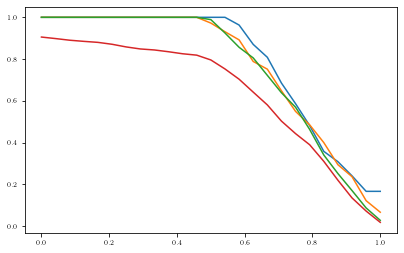

In [302]:
plt.plot(thresholds.T, recalls_nl.T)

### Linear

In [303]:
"""Linear"""
selector = True

# thresholds are the same

metric = "precisions"
precisions_lin = torch.stack([stats3d[3][selector][metric], stats5d[5][selector][metric],stats8d[8][selector][metric],stats10d[10][selector][metric]])

metric = "recalls"
recalls_lin = torch.stack([stats3d[3][selector][metric], stats5d[5][selector][metric],stats8d[8][selector][metric],stats10d[10][selector][metric]])

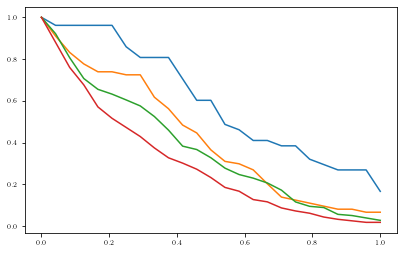

In [124]:
plt.plot(thresholds.T, recalls_lin.T)

### Both

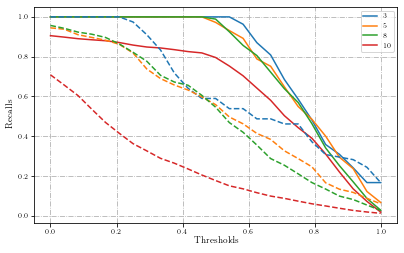

In [311]:
TICK_PADDING = 2
LABELPAD = 3
DIMS = [3,5,8,10]
COLORS = ["tab:blue","tab:orange","tab:green","tab:red"]


fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=1)['figure.figsize'])

ax = fig.add_subplot(111)
ax.grid(True, which="both", ls="-.")
ax.set_axisbelow(True)

for rec_nl, c in zip(recalls_nl, COLORS):
    im = ax.plot(thresholds[0,:], rec_nl, c=c)
for rec_lin, c in zip(recalls_lin, COLORS):
    im = ax.plot(thresholds[0,:], rec_lin, c=c, ls="--")
# ax.plot(np.linspace(.85, 6), -np.linspace(.85, 6), c="black", label='$y=x^{-2}$')
ax.set_ylabel("Recalls", labelpad=LABELPAD)
ax.set_xlabel("Thresholds", labelpad=LABELPAD)
plt.legend(DIMS)
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)

# ax = fig.add_subplot(122)
# ax.grid(True, which="both", ls="-.")
# ax.set_axisbelow(True)

# im = ax.plot(thresholds.T, recalls_lin.T, ls="--", c=COLORS)
# ax.plot(np.linspace(.85, 6), -np.linspace(.85, 6), c="black", label='$y=x^{-2}$')
# ax.set_ylabel("Recalls (Lin)", labelpad=LABELPAD)
ax.set_xlabel("Thresholds", labelpad=LABELPAD)
plt.legend(DIMS)
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)

plt.savefig("recalls.svg")

## Hinton diagram

In [ ]:
# Source: https://matplotlib.org/3.1.1/gallery/specialty_plots/hinton_demo.html

def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))


    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = BLUE if w > 0 else RED
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()

In [260]:
from notebooks.analysis import perm2matrix

In [249]:
idx = -1
j_est = est_unmix_jacobians3d[idx]
j_gt = true_unmix_jacobians3d[idx]
j_p= permute_indices3d[idx]
j_pm= perm2matrix(j_p)
# j_gt_p = j_pm.numpy() @ j_gt
j_est_corr = correct_ica_scale_permutation(torch.from_numpy(j_est.astype(np.float32)),j_pm,torch.from_numpy(j_gt.astype(np.float32))).numpy()

In [250]:
j_est_corr

array([[ 1.5320351 , -0.01130555, -0.00469695],
       [ 1.5820673 ,  1.8025558 , -0.01033536],
       [ 1.96809   ,  1.4212089 ,  1.5321796 ]], dtype=float32)

In [318]:
true_unmix_jacobians_monti

[array([[ 0.00252052,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.01277678,  0.00205859,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.03138999, -0.01081219,  0.0021257 ,  0.        ,  0.        ,
          0.        ],
        [-0.07721966,  0.03315201, -0.01093221,  0.00156558,  0.        ,
          0.        ],
        [ 0.14143941, -0.06895113,  0.02950584, -0.00946515,  0.00222511,
          0.        ],
        [-0.20769876,  0.10927062, -0.05303581,  0.02336621, -0.00951978,
          0.0020853 ]]),
 array([[ 0.00163575,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.00963337,  0.00209877,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.02328577, -0.00941281,  0.00175942,  0.        ,  0.        ,
          0.        ],
        [-0.04222301,  0.02079622, -0.00729232,  0.00161148,  0.        ,
          0.        ],
        [ 0.06250732, -0.036